In [ ]:
# Practical 3: Linear Regression on one and multiple variables

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
np.random.seed(42)
n_samples = 100
X = np.random.rand(n_samples, 1) 
y = np.sin(X).ravel() + np.random.normal(0, 0.5, n_samples)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [3]:
def compute_cost(x, y, w, b):

    m = x.shape[0]
    cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

def compute_gradient(x, y, w, b):
    # Number of training examples
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i}: Cost {J_history[-1]}",
                  f"dj_dw: {dj_dw}, dj_db: {dj_db}",
                  f"w: {w}, b:{b}")

    return w, b, J_history, p_history

In [4]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(X_train ,y_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final},{b_final})")

Iteration 0: Cost [0.19683871] dj_dw: [-0.22377796], dj_db: [-0.38786541] w: [0.00223778], b:[0.00387865]
Iteration 1000: Cost [0.11351237] dj_dw: [-0.01292618], dj_db: [0.00643377] w: [0.34317727], b:[0.23440322]
Iteration 2000: Cost [0.11233985] dj_dw: [-0.00679901], dj_db: [0.00338517] w: [0.4385118], b:[0.18693866]
Iteration 3000: Cost [0.11201541] dj_dw: [-0.00357643], dj_db: [0.00178067] w: [0.48865943], b:[0.1619706]
Iteration 4000: Cost [0.11192564] dj_dw: [-0.00188128], dj_db: [0.00093667] w: [0.51503815], b:[0.14883687]
Iteration 5000: Cost [0.1119008] dj_dw: [-0.00098959], dj_db: [0.00049271] w: [0.52891392], b:[0.14192825]
Iteration 6000: Cost [0.11189393] dj_dw: [-0.00052055], dj_db: [0.00025918] w: [0.53621286], b:[0.13829417]
Iteration 7000: Cost [0.11189203] dj_dw: [-0.00027382], dj_db: [0.00013633] w: [0.54005226], b:[0.13638256]
Iteration 8000: Cost [0.1118915] dj_dw: [-0.00014403], dj_db: [7.17132969e-05] w: [0.54207187], b:[0.13537702]
Iteration 9000: Cost [0.111891

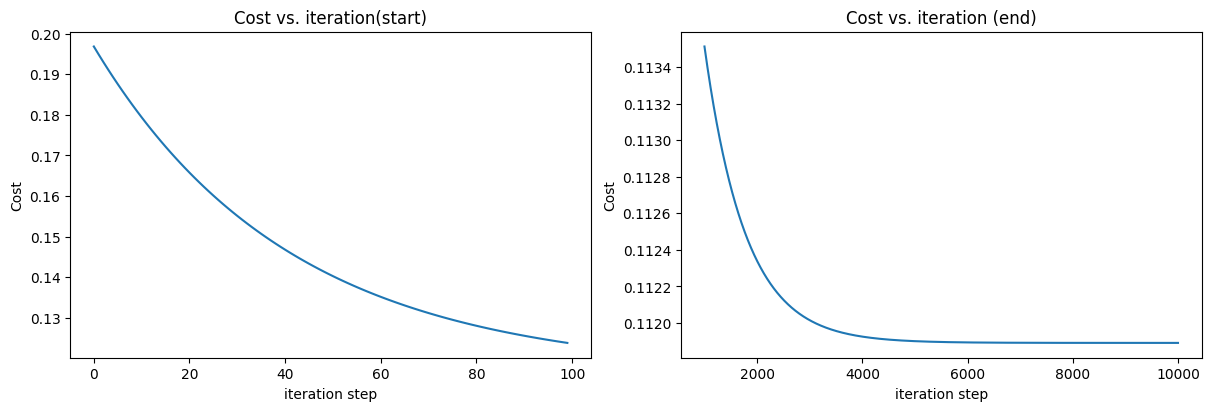

In [5]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step')
plt.show()

In [11]:
n_samples = 100
X_mult= np.random.rand(n_samples, 1) * 10
y_mult = np.sin(X).ravel() + np.random.normal(0, 0.5, n_samples)

# Split data into training and testing sets
X_mult_train, X_mult_test, y_mult_train, y_mult_test = train_test_split(X_mult, y_mult, test_size=0.4, random_state=42)


In [12]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_mult_final, b_mult_final, J_hist, p_hist = gradient_descent(X_mult_train ,y_mult_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_mult_final},{b_mult_final})")

Iteration 0: Cost [0.19968608] dj_dw: [-2.36350063], dj_db: [-0.37835805] w: [0.02363501], b:[0.00378358]
Iteration 1000: Cost [0.17164959] dj_dw: [0.0009644], dj_db: [-0.007192] w: [0.01938854], b:[0.25731427]
Iteration 2000: Cost [0.17152796] dj_dw: [0.00011494], dj_db: [-0.00085719] w: [0.01539923], b:[0.28706448]
Iteration 3000: Cost [0.17152623] dj_dw: [1.3699589e-05], dj_db: [-0.00010216] w: [0.01492376], b:[0.29061029]
Iteration 4000: Cost [0.17152621] dj_dw: [1.63279789e-06], dj_db: [-1.21765532e-05] w: [0.01486709], b:[0.2910329]
Iteration 5000: Cost [0.17152621] dj_dw: [1.9460649e-07], dj_db: [-1.45127348e-06] w: [0.01486034], b:[0.29108327]
Iteration 6000: Cost [0.17152621] dj_dw: [2.31943504e-08], dj_db: [-1.7297134e-07] w: [0.01485953], b:[0.29108927]
Iteration 7000: Cost [0.17152621] dj_dw: [2.76443947e-09], dj_db: [-2.06157454e-08] w: [0.01485943], b:[0.29108999]
Iteration 8000: Cost [0.17152621] dj_dw: [3.29482038e-10], dj_db: [-2.45710628e-09] w: [0.01485942], b:[0.291

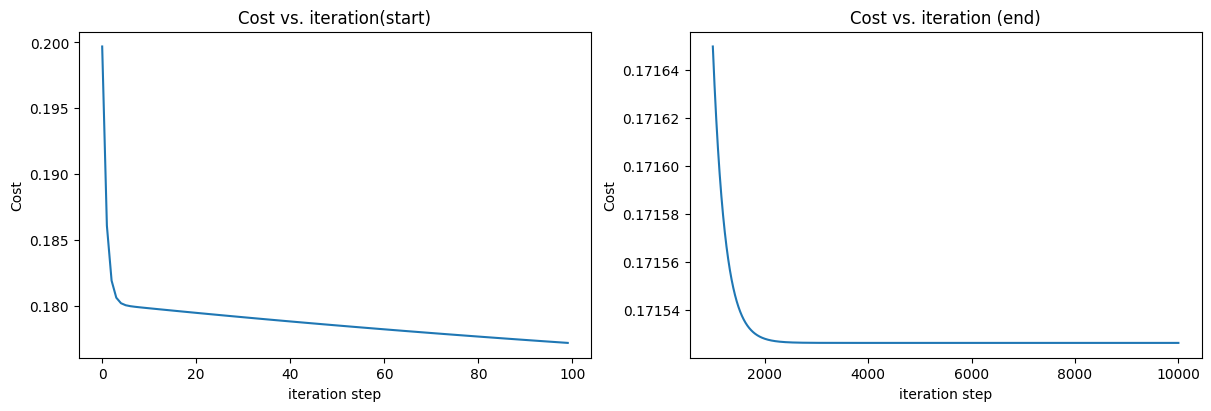

In [13]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step')
plt.show()